In [ ]:
from __future__ import print_function
from __future__ import division

import numpy as np
import languagemodel as lm

np.random.seed(1)  # for reproducibility

corpus_train = lm.readCorpus("data/train.txt")
corpus_dev   = lm.readCorpus("data/dev.txt")
corpus_test  = lm.readCorpus("data/test.txt")

# build a common index (words to integers), mapping rare words (less than 5 occurences) to index 0
# nwords = vocabulary size for the models that only see the indexes

w2index,nwords = lm.buildIndex(corpus_train+corpus_dev+corpus_test)

# find words that appear in the training set so we can deal with new words separately
count_train = np.zeros((nwords,))
for snt in corpus_train:
    for w in snt:
        count_train[w2index[w]] += 1

# Bigram model as a baseline
alpha = 0.1 # add-alpha smoothing
probB           = lm.bigramLM(corpus_train, w2index, nwords,alpha)
LLB, N          = 0.0, 0
bi              = lm.ngramGen(corpus_dev, w2index, 2)
for w in bi:
    if (count_train[w[1]]>0): # for now, skip target words not seen in training
        LLB += np.log(probB[w[0], w[1]])
        N += 1
print("Bi-gram Dev LL = {0}".format(LLB / N))

# Network model
print("\nNetwork model training:")
n        = 3    # Length of n-gram 
dim      = 10   # Word vector dimension
hdim     = 30  # Hidden units
neurallm = lm.neuralLM(dim, n, hdim, nwords)  # The network model

ngrams = lm.ngramGen(corpus_train,w2index,n)
ngrams2 = lm.ngramGen(corpus_dev,w2index,n)

lrate = 0.5  # Learning rate
for it in xrange(10): # passes through the training data
    LL, N  = 0.0, 0 # Average log-likelihood, number of ngrams    
    for ng in ngrams:
        pr = neurallm.update(ng,lrate)
        LL += np.log(pr)
        N  += 1
    print('Train:\t{0}\tLL = {1}'.format(it, LL / N)) 

    #Dev set
    LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
    for ng in ngrams2:
        if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
            pr = neurallm.prob(ng)
            LL += np.log(pr)
            N  += 1
    print('Dev:\t{0}\tLL = {1}'.format(it, LL / N)) 


In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import languagemodel as lm

np.random.seed(1)  # for reproducibility

corpus_train = lm.readCorpus("data/train.txt")
corpus_dev   = lm.readCorpus("data/dev.txt")
corpus_test  = lm.readCorpus("data/test.txt")

# build a common index (words to integers), mapping rare words (less than 5 occurences) to index 0
# nwords = vocabulary size for the models that only see the indexes

w2index,nwords = lm.buildIndex(corpus_train+corpus_dev+corpus_test)

# find words that appear in the training set so we can deal with new words separately
count_train = np.zeros((nwords,))
for snt in corpus_train:
    for w in snt:
        count_train[w2index[w]] += 1

# Bigram model as a baseline
alpha = 0.1 # add-alpha smoothing
probB           = lm.bigramLM(corpus_train, w2index, nwords,alpha)
LLB, N          = 0.0, 0
bi              = lm.ngramGen(corpus_dev, w2index, 2)
for w in bi:
    if (count_train[w[1]]>0): # for now, skip target words not seen in training
        LLB += np.log(probB[w[0], w[1]])
        N += 1
print("Bi-gram Dev LL = {0}".format(LLB / N))

Bi-gram Dev LL = -4.992084628169756


## 1. Configure baseline bigram model

In [45]:
llh_bi_list = []
for alphax in np.linspace(0.005, 0.1, 20):
    probB           = lm.bigramLM(corpus_train, w2index, nwords,alphax)
    LLB, N          = 0.0, 0
    bi              = lm.ngramGen(corpus_dev, w2index, 2)
    for w in bi:
        if (count_train[w[1]]>0): # for now, skip target words not seen in training
            LLB += np.log(probB[w[0], w[1]])
            N += 1
    print("Bi-gram Dev LL = {0} with alpha {1}".format(LLB / N, alphax))
    llh_bi_list.append(LLB / N)

Bi-gram Dev LL = -4.948425066555479 with alpha 0.005
Bi-gram Dev LL = -4.883153686434726 with alpha 0.01
Bi-gram Dev LL = -4.864619740209547 with alpha 0.015
Bi-gram Dev LL = -4.860978607317725 with alpha 0.02
Bi-gram Dev LL = -4.863757939080634 with alpha 0.025
Bi-gram Dev LL = -4.869712234971148 with alpha 0.030000000000000002
Bi-gram Dev LL = -4.877345106194942 with alpha 0.034999999999999996
Bi-gram Dev LL = -4.885883828299522 with alpha 0.04
Bi-gram Dev LL = -4.89489816262743 with alpha 0.045
Bi-gram Dev LL = -4.904135817380125 with alpha 0.049999999999999996
Bi-gram Dev LL = -4.913443507489412 with alpha 0.055
Bi-gram Dev LL = -4.922725970490986 with alpha 0.06
Bi-gram Dev LL = -4.931923344358705 with alpha 0.065
Bi-gram Dev LL = -4.940998056193698 with alpha 0.07
Bi-gram Dev LL = -4.949926915954853 with alpha 0.07500000000000001
Bi-gram Dev LL = -4.958696190725572 with alpha 0.08
Bi-gram Dev LL = -4.96729845155322 with alpha 0.085
Bi-gram Dev LL = -4.975730508786532 with alpha 0

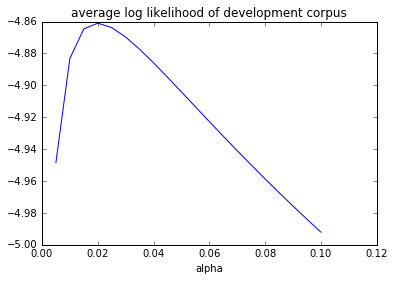

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.linspace(0.005, 0.1, 20), llh_bi_list)
plt.xlabel("alpha")
plt.title("average log likelihood of development corpus")

In [52]:
bi_test = lm.ngramGen(corpus_test, w2index, 2)
alpha = 0.02
probB           = lm.bigramLM(corpus_train, w2index, nwords,alpha)
LLB, N          = 0.0, 0

for w in bi_test:
    if (count_train[w[1]]>0): # for now, skip target words not seen in training
        LLB += np.log(probB[w[0], w[1]])
        N += 1
print("Bi-gram Test LL = {0} with alpha {1}".format(LLB / N, alpha))

Bi-gram Test LL = -4.8457415193597155 with alpha 0.02


## 2. Neural Network

In [63]:
neural_result1 = []

iter_num = 2
lrate = 0.5  # Learning rate
for n in [2,3,4,5]:
    ngrams = lm.ngramGen(corpus_train,w2index,n)
    ngrams2 = lm.ngramGen(corpus_dev,w2index,n)
    for dim in [5, 10, 20]:
        for hdim in [10, 30, 50]:
            neurallm = lm.neuralLM(dim, n, hdim, nwords)
            temp_result = []

            for it in range(iter_num): # passes through the training data
                for ng in ngrams:
                    pr = neurallm.update(ng,lrate)

                #Dev set
                LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
                for ng in ngrams2:
                    if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
                        pr = neurallm.prob(ng)
                        LL += np.log(pr)
                        N  += 1
                temp_result.append(LL/N)
            print('n={0}, dim={1}, hdim={2}, dev llh={3}'.format(n, dim, hdim, np.mean(temp_result)))
            neural_result1.append([n, dim, hdim, temp_result])

n=2, dim=5, hdim=10, dev llh=-4.904785539558707
n=2, dim=5, hdim=30, dev llh=-4.843481341786308
n=2, dim=5, hdim=50, dev llh=-4.852710258312751
n=2, dim=10, hdim=10, dev llh=-4.890904005127846
n=2, dim=10, hdim=30, dev llh=-4.794984424580786
n=2, dim=10, hdim=50, dev llh=-4.791471388025544
n=2, dim=20, hdim=10, dev llh=-4.89460135846894
n=2, dim=20, hdim=30, dev llh=-4.78056648744739
n=2, dim=20, hdim=50, dev llh=-4.748481825794477
n=3, dim=5, hdim=10, dev llh=-4.928681366597829
n=3, dim=5, hdim=30, dev llh=-4.7964473688033475
n=3, dim=5, hdim=50, dev llh=-4.801392721426568
n=3, dim=10, hdim=10, dev llh=-4.856130935224388
n=3, dim=10, hdim=30, dev llh=-4.7607189154156435
n=3, dim=10, hdim=50, dev llh=-4.7761424349909625
n=3, dim=20, hdim=10, dev llh=-4.861990937226091
n=3, dim=20, hdim=30, dev llh=-4.755165327400062
n=3, dim=20, hdim=50, dev llh=-4.735656115163282
n=4, dim=5, hdim=10, dev llh=-4.90576103197
n=4, dim=5, hdim=30, dev llh=-4.84448892606861
n=4, dim=5, hdim=50, dev llh=-4.

In [65]:
neural_result2 = []

iter_num = 10
lrate = 0.5  # Learning rate
for n in [3]:
    ngrams = lm.ngramGen(corpus_train,w2index,n)
    ngrams2 = lm.ngramGen(corpus_dev,w2index,n)
    for dim in [50, 75, 100]:
        for hdim in [40, 50, 60]:
            neurallm = lm.neuralLM(dim, n, hdim, nwords)
            temp_result = []

            for it in range(iter_num): # passes through the training data
                for ng in ngrams:
                    pr = neurallm.update(ng,lrate)

                #Dev set
                LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
                for ng in ngrams2:
                    if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
                        pr = neurallm.prob(ng)
                        LL += np.log(pr)
                        N  += 1
                temp_result.append(LL/N)
            print('n={0}, dim={1}, hdim={2}, dev llh={3}'.format(n, dim, hdim, np.mean(temp_result)))
            neural_result2.append([n, dim, hdim, temp_result])

n=3, dim=50, hdim=40, dev llh=-4.615536150004457
n=3, dim=50, hdim=50, dev llh=-4.6432565387426985
n=3, dim=50, hdim=60, dev llh=-4.630532437885575
n=3, dim=75, hdim=40, dev llh=-4.6397915786224555
n=3, dim=75, hdim=50, dev llh=-4.626198648142621
n=3, dim=75, hdim=60, dev llh=-4.607094358766884
n=3, dim=100, hdim=40, dev llh=-4.623066747344818
n=3, dim=100, hdim=50, dev llh=-4.63456676862269
n=3, dim=100, hdim=60, dev llh=-4.626712758690609


In [69]:
neural_result2 = []

iter_num = 5
lrate = 0.5  # Learning rate
for n in [3]:
    ngrams = lm.ngramGen(corpus_train,w2index,n)
    ngrams2 = lm.ngramGen(corpus_dev,w2index,n)
    for dim in [75]:
        for hdim in [60,70,80]:
            neurallm = lm.neuralLM(dim, n, hdim, nwords)
            temp_result = []

            for it in range(iter_num): # passes through the training data
                for ng in ngrams:
                    pr = neurallm.update(ng,lrate)

                #Dev set
                LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
                for ng in ngrams2:
                    if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
                        pr = neurallm.prob(ng)
                        LL += np.log(pr)
                        N  += 1
                temp_result.append(LL/N)
            print('n={0}, dim={1}, hdim={2}, dev llh={3}'.format(n, dim, hdim, np.mean(temp_result)))
            neural_result2.append([n, dim, hdim, temp_result])

n=3, dim=75, hdim=60, dev llh=-4.6397105792343725
n=3, dim=75, hdim=70, dev llh=-4.632634290665759
n=3, dim=75, hdim=80, dev llh=-4.6349324644524925


In [81]:
neural_result3 = []

iter_num = 10
lrate = 0.5  # Learning rate
for n in [3]:
    ngrams = lm.ngramGen(corpus_train,w2index,n)
    ngrams2 = lm.ngramGen(corpus_dev,w2index,n)
    ngrams_test = lm.ngramGen(corpus_test,w2index,n)
    for dim in [75]:
        for hdim in [70]:
            neurallm = lm.neuralLM(dim, n, hdim, nwords)
            temp_result = []

            for it in range(iter_num): # passes through the training data
                for ng in ngrams:
                    pr = neurallm.update(ng,lrate)

                #Dev set
                LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
                for ng in ngrams_test:
                    if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
                        pr = neurallm.prob(ng)
                        LL += np.log(pr)
                        N  += 1
                temp_result.append(LL/N)
            print('n={0}, dim={1}, hdim={2}, test llh={3}'.format(n, dim, hdim, np.mean(temp_result)))
            neural_result3.append([n, dim, hdim, temp_result])

n=3, dim=75, hdim=70, dev llh=-4.587264484668621


In [82]:
# neural_result4 = []

iter_num = 5
lrate = 0.5  # Learning rate
for n in [3]:
    ngrams = lm.ngramGen(corpus_train,w2index,n)
    ngrams2 = lm.ngramGen(corpus_dev,w2index,n)
    ngrams_test = lm.ngramGen(corpus_test,w2index,n)
    for dim in [10]:
        for hdim in [150]:
            neurallm = lm.neuralLM(dim, n, hdim, nwords)
            temp_result = []

            for it in range(iter_num): # passes through the training data
                for ng in ngrams:
                    pr = neurallm.update(ng,lrate)

                #Dev set
                LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
                for ng in ngrams_test:
                    if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
                        pr = neurallm.prob(ng)
                        LL += np.log(pr)
                        N  += 1
                temp_result.append(LL/N)
            print('n={0}, dim={1}, hdim={2}, test llh={3}'.format(n, dim, hdim, np.mean(temp_result)))
            neural_result4.append([n, dim, hdim, np.mean(temp_result), temp_result])

n=3, dim=10, hdim=10, dev llh=-4.75421944995654
n=3, dim=10, hdim=30, dev llh=-4.668805868425711
n=3, dim=10, hdim=50, dev llh=-4.657645435001167
n=3, dim=10, hdim=75, dev llh=-4.65722058607932
n=3, dim=10, hdim=100, dev llh=-4.658201748436989
n=3, dim=10, hdim=200, dev llh=-4.669317512159063


In [88]:
for n in [3]:
    ngrams = lm.ngramGen(corpus_train,w2index,n)
    ngrams2 = lm.ngramGen(corpus_dev,w2index,n)
    ngrams_test = lm.ngramGen(corpus_test,w2index,n)
    for dim in [10]:
        for hdim in [20]:
            neurallm = lm.neuralLM(dim, n, hdim, nwords)
            temp_result = []

            for it in range(iter_num): # passes through the training data
                for ng in ngrams:
                    pr = neurallm.update(ng,lrate)

                #Dev set
                LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
                for ng in ngrams_test:
                    if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
                        pr = neurallm.prob(ng)
                        LL += np.log(pr)
                        N  += 1
                temp_result.append(LL/N)
            print('n={0}, dim={1}, hdim={2}, test llh={3}'.format(n, dim, hdim, np.mean(temp_result)))
            neural_result4.append([n, dim, hdim, np.mean(temp_result), temp_result])

n=3, dim=10, hdim=20, test llh=-4.6895681331534185


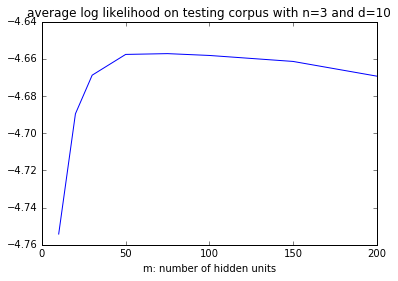

In [89]:
neural_result4_sorted = sorted(neural_result4, key=lambda x: x[2])

avg_llh_m = [a[3] for a in neural_result4_sorted]
all_m = [a[2] for a in neural_result4_sorted]
plt.plot(all_m, avg_llh_m)
plt.xlabel("m: number of hidden units")
plt.title("average log likelihood on testing corpus with n=3 and d=10")

In [78]:
test_stn_1 = [["the", "choice", "of", "their", "class", "is", "good"]]
test_stn_2 = [["the", "choice", "of", "there", "class", "is", "good"]]


test_trigram_1 = lm.ngramGen(test_stn_1,w2index,3)
test_trigram_2 = lm.ngramGen(test_stn_2,w2index,3)

In [74]:
test_trigram_1

[[1418, 1417, 620],
 [1417, 620, 1092],
 [620, 1092, 912],
 [1092, 912, 1056],
 [912, 1056, 0],
 [1056, 0, 230],
 [0, 230, 598]]

In [79]:
LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
for ng in test_trigram_1:
    pr = neurallm.prob(ng)
    LL += np.log(pr)
    N  += 1
print(LL/N)

-5.26790220051


In [80]:
LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
for ng in test_trigram_2:
    pr = neurallm.prob(ng)
    LL += np.log(pr)
    N  += 1
print(LL/N)

-6.05290330802


In [55]:
# Network model
print("\nNetwork model training:")
n        = 3    # Length of n-gram 
dim      = 50   # Word vector dimension
hdim     = 100  # Hidden units
neurallm = lm.neuralLM(dim, n, hdim, nwords)  # The network model

ngrams = lm.ngramGen(corpus_train,w2index,n)
ngrams2 = lm.ngramGen(corpus_dev,w2index,n)

lrate = 0.5  # Learning rate
for it in range(5): # passes through the training data
    LL, N  = 0.0, 0 # Average log-likelihood, number of ngrams    
    for ng in ngrams:
        pr = neurallm.update(ng,lrate)
        LL += np.log(pr)
        N  += 1
    print('Train:\t{0}\tLL = {1}'.format(it, LL / N)) 

    #Dev set
    LL, N = 0.0, 0 # Average log-likelihood, number of ngrams
    for ng in ngrams2:
        if (count_train[ng[-1]]>0): # for now, skip target words not seen in training
            pr = neurallm.prob(ng)
            LL += np.log(pr)
            N  += 1
    print('Dev:\t{0}\tLL = {1}'.format(it, LL / N)) 



Network model training:
Train:	0	LL = -5.183838706612703
Dev:	0	LL = -4.83666408983967
Train:	1	LL = -4.630877101085274
Dev:	1	LL = -4.7168726314392515
Train:	2	LL = -4.466241028270229
Dev:	2	LL = -4.668948482547839
Train:	3	LL = -4.367345741095842
Dev:	3	LL = -4.644548897022256


KeyboardInterrupt: 